In [1]:
import glob
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
import logging
sys.path.append('../')
import src.read_pic as rp
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)]
)
logger = logging.getLogger(__name__)

In [7]:
files_path = "/volume1/scratch/share_dir/iPiC3D/Harris/GEM5v2/"
all_hdf_files = sorted(glob.glob(os.path.join(files_path, "proc*.hdf")))
np.array(rp.ipic3D_available_cycles(files_path))

array([[0.0000000e+00, 1.0000000e+03, 2.0000000e+03, 3.0000000e+03,
        4.0000000e+03, 5.0000000e+03, 6.0000000e+03, 7.0000000e+03,
        8.0000000e+03, 9.0000000e+03, 1.0000000e+04, 1.1000000e+04,
        1.2000000e+04, 1.3000000e+04, 1.4000000e+04, 1.5000000e+04,
        1.6000000e+04, 1.7000000e+04, 1.8000000e+04, 1.9000000e+04,
        2.0000000e+04, 2.1000000e+04, 2.2000000e+04, 2.3000000e+04,
        2.4000000e+04, 2.5000000e+04, 2.6000000e+04, 2.7000000e+04,
        2.8000000e+04, 2.9000000e+04, 3.0000000e+04, 3.1000000e+04,
        3.2000000e+04, 3.3000000e+04, 3.4000000e+04, 3.5000000e+04,
        3.6000000e+04, 3.7000000e+04, 3.8000000e+04, 3.9000000e+04,
        4.0000000e+04, 4.1000000e+04, 4.2000000e+04, 4.3000000e+04,
        4.4000000e+04, 4.5000000e+04, 4.6000000e+04, 4.7000000e+04,
        4.8000000e+04, 4.9000000e+04, 5.0000000e+04, 5.1000000e+04,
        5.2000000e+04, 5.3000000e+04, 5.4000000e+04, 5.5000000e+04,
        5.6000000e+04, 5.7000000e+04, 5.8000000e

In [ ]:
Jz_0 = rp.read_ipic3d_field(files_path, [0, 200, 400], 'Jz_2', verbose=False)
X, Y = rp.build_XY(files_path)
X.shape, Y.shape
Jz_0.shape, X.shape, Y.shape


((256, 256, 3), (256, 256), (256, 256))

In [7]:
cycles = [0, 200, 400]
data = rp.read_data_ipic3d(files_path, cycles=cycles, choose_species=['e','i','e','i'],
                            fields_to_read={"B":True,"B_ext":False,"divB":False,"E":True,"E_ext":False,"rho":True,"J":True,
                "P":False,"PI":False,"Heat_flux":False,"N":False,"Qrem":False}, verbose=False)

Ez 0.0 0.0
Ez: field_value.max() <= 0:
Ey 0.0 0.0
Ey: field_value.max() <= 0:
Jx -0.0032483007285998497 0.003349788669359633
Jy -0.0008791088691473275 0.0010805757608939753
Jz -0.0010917721047978683 0.001148754123771295
Bx -0.10512380552178388 0.10512625299724929
By -0.03410053182272071 0.03410053182272071
Bz 0.0 0.0
Bz: field_value.max() <= 0:
rho -0.15704690173393124 -0.07957747154594762
rho: field_value.max() <= 0:


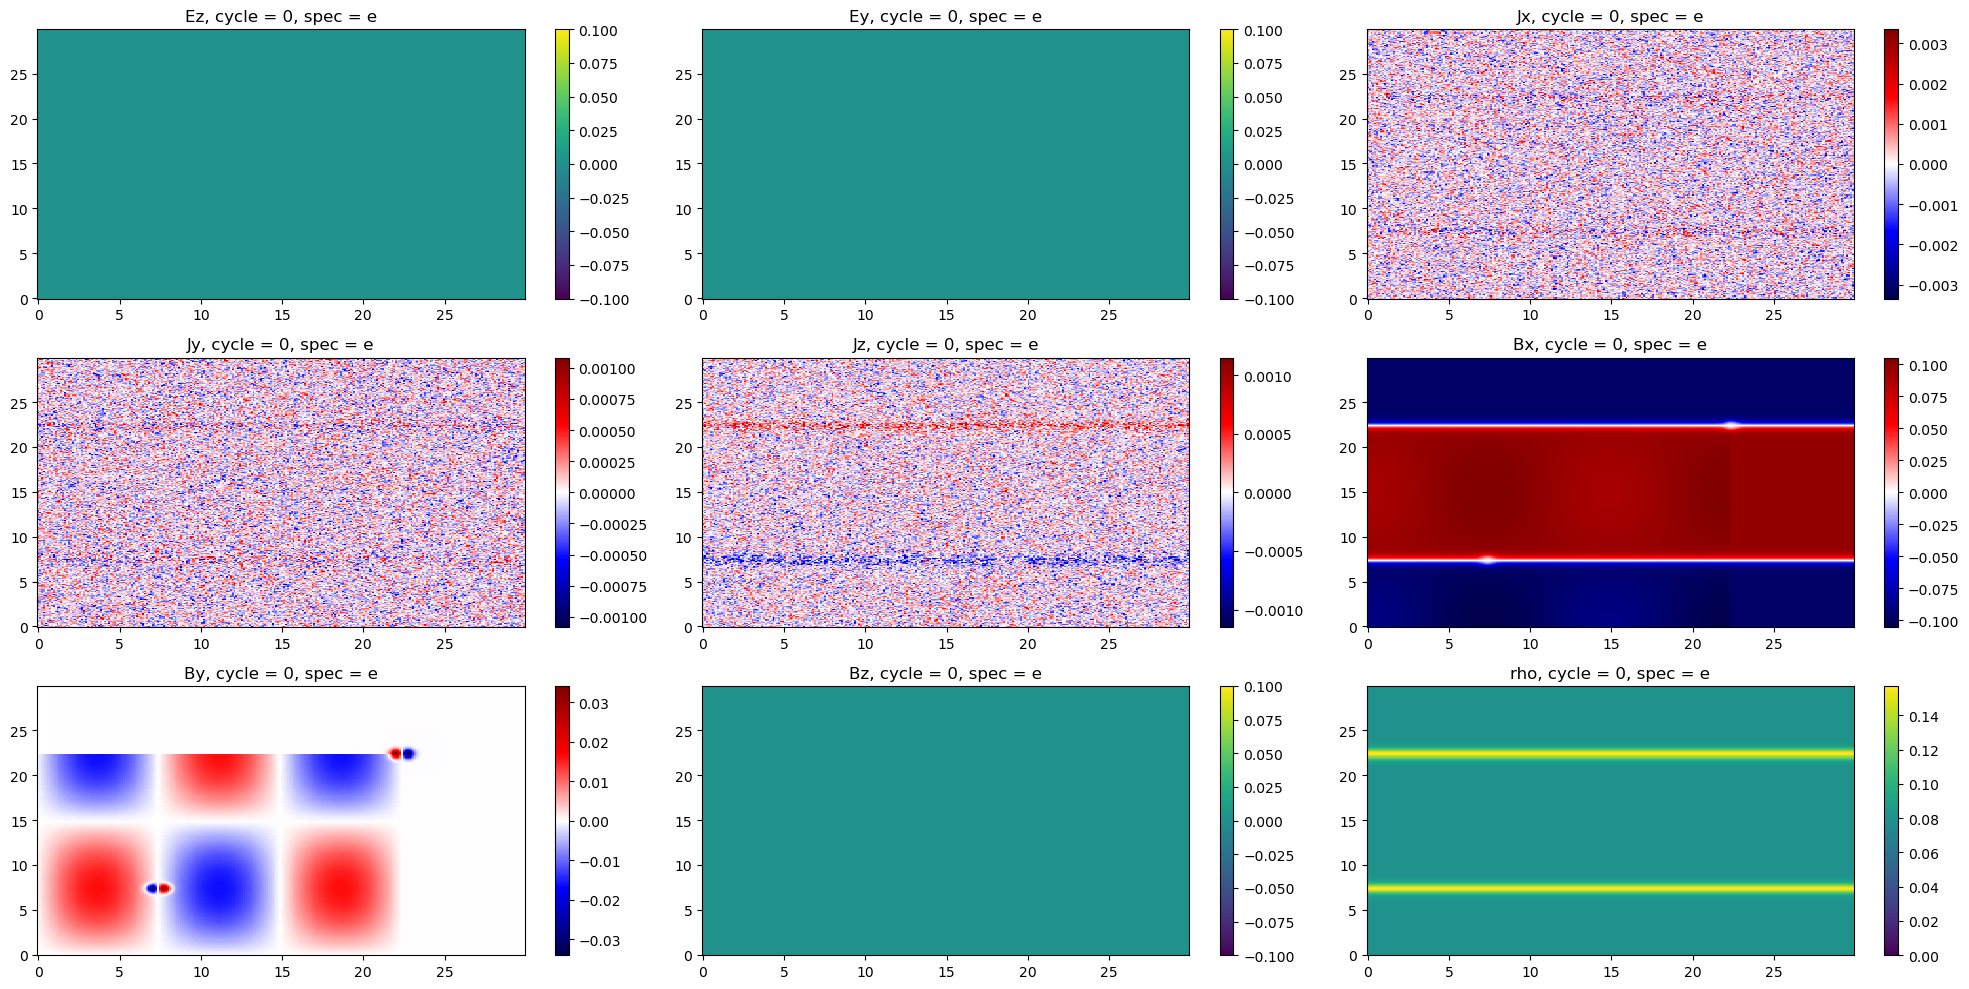

In [6]:
cycles = [0, 200, 400]

import matplotlib.pyplot as plt
spec = 'e'
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
i = 0  # Only plot the last value of i
for idx, field in enumerate(['Ez', 'Ey', 'Jx', 'Jy', 'Jz', 'Bx', 'By', 'Bz', 'rho']):
    row, col = divmod(idx, 3)
    if isinstance(data[field], dict):
        field_value = data[field][spec][...,i]
    else:
        field_value = data[field][...,i]
    vmin, vmax = None, None
    print(field, field_value.min(), field_value.max())
    if field_value.max()*field_value.min() < 0:
        vmax = max(field_value.max(), -field_value.min())
        vmin = -vmax
        cmap = 'seismic'
    else:
        if field_value.max() <= 0:
            print(f"{field}: field_value.max() <= 0:")
            field_value = - field_value
        cmap = 'viridis'
        vmax = field_value.max()
        vmin = 0
    
    im = axes[row, col].pcolormesh(X, Y, field_value, cmap=cmap, vmax=vmax, vmin=vmin)
    axes[row, col].set_title(f"{field}, cycle = {cycles[i]}, spec = {spec}")
    fig.colorbar(im, ax=axes[row, col])
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
time = 1
vmax = max(Jz_0[...,time].max(), -Jz_0[...,time].min())
plt.pcolormesh(X,Y,Jz_0[...,time],cmap='seismic', vmax=vmax, vmin=-vmax)
plt.xlabel("X", fontsize = 16); plt.ylabel("Y", fontsize = 16)
plt.tick_params(axis = 'x', which = 'major', labelsize = 12, length = 6)
plt.tick_params(axis = 'y', which = 'major', labelsize = 12, length = 6)
plt.title("Jz", fontsize = 18); plt.colorbar()

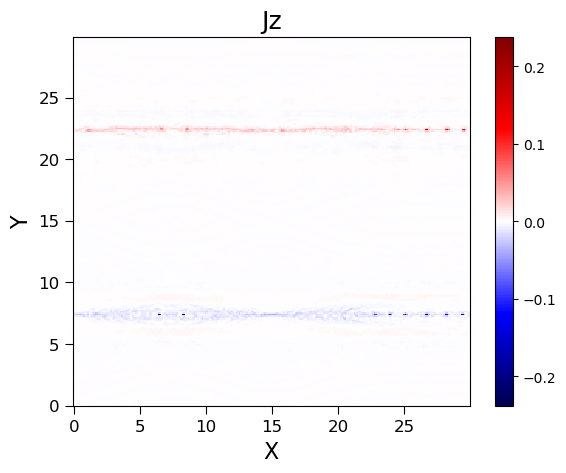

In [10]:
import matplotlib.pyplot as plt
time = 1
vmax = max(Jz_0[...,time].max(), -Jz_0[...,time].min())
plt.pcolormesh(X,Y,Jz_0[...,time],cmap='seismic', vmax=vmax, vmin=-vmax)
plt.xlabel("X", fontsize = 16); plt.ylabel("Y", fontsize = 16)
plt.tick_params(axis = 'x', which = 'major', labelsize = 12, length = 6)
plt.tick_params(axis = 'y', which = 'major', labelsize = 12, length = 6)
plt.title("Jz", fontsize = 18); plt.colorbar()

In [11]:
Bz = rp.read_ipic3d_field(files_path, [0, 200, 400], 'Bz', verbose=False)

In [8]:
def parse_simulation_data(files_path):
    """
    Parse SimulationData.txt file that can be in either old or new format.
    
    Old format uses key patterns like "x-Length" and "Number of cells (x)"
    New format uses "Simulation domain" and "Grid resolution" with comma-separated values
    
    Returns:
    - dict: A dictionary containing Lx, Ly, Lz, nxc, nyc, nzc, dt, and qom values
    """
    try:
        f = open(files_path + "SimulationData.txt", "r")
    except Exception:
        # Remove the last folder from files_path
        files_path = os.path.dirname(os.path.normpath(files_path)) + os.sep
        f = open(files_path + "SimulationData.txt", "r")
    
    content = f.readlines()
    f.close()
    
    # Initialize variables
    result = {
        'Lx': None, 'Ly': None, 'Lz': None,
        'nxc': None, 'nyc': None, 'nzc': None,
        'dt': None, 'qom': []
    }
    
    # Try to detect format by checking for key indicators
    content_str = ''.join(content)
    is_new_format = "Simulation domain" in content_str and "Grid resolution" in content_str
    
    if is_new_format:
        # Parse new format
        for line in content:
            line_clean = line.strip()
            
            # Parse Simulation domain (e.g., "Simulation domain = 30 x 30 x 1")
            if line_clean.startswith("Simulation domain"):
                parts = line_clean.split("=")[1].strip().split("x")
                result['Lx'] = float(parts[0].strip())
                result['Ly'] = float(parts[1].strip())
                result['Lz'] = float(parts[2].strip())
            
            # Parse Grid resolution (e.g., "Grid resolution = 100 x 100 x 1")
            elif line_clean.startswith("Grid resolution"):
                parts = line_clean.split("=")[1].strip().split("x")
                result['nxc'] = int(parts[0].strip())
                result['nyc'] = int(parts[1].strip())
                result['nzc'] = int(parts[2].strip())
            
            # Parse Time step size (e.g., "Time step size (dt) = 0.125")
            elif "Time step size" in line_clean:
                result['dt'] = float(line_clean.split("=")[1].strip())
            
            # Parse Charge-to-mass ratio
            elif "Charge-to-mass ratio" in line_clean:
                qom_val = float(line_clean.split("=")[1].strip())
                result['qom'].append(qom_val)
    else:
        # Parse old format
        for n in content:
            if "QOM" in n:
                result['qom'].append(float(re.split("=", re.sub(" |\n", "", n))[-1]))
            if "x-Length" in n:
                result['Lx'] = float(re.split("=", re.sub(" |\n", "", n))[1])
            if "y-Length" in n:
                result['Ly'] = float(re.split("=", re.sub(" |\n", "", n))[1])
            if "z-Length" in n:
                result['Lz'] = float(re.split("=", re.sub(" |\n", "", n))[1])
            if "Number of cells (x)" in n:
                result['nxc'] = int(re.split("=", re.sub(" |\n", "", n))[1])
            if "Number of cells (y)" in n:
                result['nyc'] = int(re.split("=", re.sub(" |\n", "", n))[1])
            if "Number of cells (z)" in n:
                result['nzc'] = int(re.split("=", re.sub(" |\n", "", n))[1])
            if "Time step" in n:
                result['dt'] = float(re.split("=", re.sub(" |\n", "", n))[1])
    
    return result

DEFAULT_CHOOSE_X = None
DEFAULT_CHOOSE_Y = None
DEFAULT_CHOOSE_Z = None
DEFAULT_INDEXING = 'ij'
DEFAULT_VERBOSE = False
def build_XY(files_path, choose_x=DEFAULT_CHOOSE_X, choose_y=DEFAULT_CHOOSE_Y, 
             choose_z=DEFAULT_CHOOSE_Z, indexing=DEFAULT_INDEXING):
    """
    Read grid parameters from SimulationData.txt and build coordinate meshgrids.
    Supports both old and new SimulationData.txt formats.
    """
    sim_data = parse_simulation_data(files_path)
    
    Lx = sim_data['Lx']
    Ly = sim_data['Ly']
    Lz = sim_data['Lz']
    nxc = sim_data['nxc']
    nyc = sim_data['nyc']
    nzc = sim_data['nzc']
    qom = sim_data['qom']
    
    # The x, y and z axes are set.
    x = np.linspace(0, Lx, nxc + 1)
    y = np.linspace(0, Ly, nyc + 1)
    z = np.linspace(0, Lz, nzc + 1)
    
    if choose_x is None:
        choose_x = [0, nxc]
    if choose_y is None:
        choose_y = [0, nyc]
    if choose_z is None:
        choose_z = [0, nzc]
    
    if isinstance(choose_x[0], list):
        if isinstance(choose_y[0], list):
            raise ValueError("choose_x and choose_y must be of the same type")
        X = []
        Y = []
        if nzc > 1:
            Z = []
        for i in range(len(choose_x)):  # deal with the situation where the user wants to extract multiple regions
            assert len(choose_x) == len(choose_y), "choose_x and choose_y must have the same length"
            if nzc > 1:
                assert len(choose_x) == len(choose_z), "choose_x and choose_y must have the same length"
                X_i, Y_i, Z_i = np.meshgrid(
                    x[choose_x[i][0]:choose_x[i][1]], 
                    y[choose_y[i][0]:choose_y[i][1]], 
                    z[choose_z[i][0]:choose_z[i][1]], 
                    indexing=indexing
                )
                X.append(X_i)
                Y.append(Y_i)
                Z.append(Z_i)
            else:
                X_i, Y_i = np.meshgrid(
                    x[choose_x[i][0]:choose_x[i][1]], 
                    y[choose_y[i][0]:choose_y[i][1]], 
                    indexing=indexing
                )
                X.append(X_i)
                Y.append(Y_i)
        X = np.concatenate(X, axis=1)
        Y = np.concatenate(Y, axis=1)
        if nzc > 1:
            Z = np.concatenate(Z, axis=1)
    else:
        if nzc > 1:
            X, Y, Z = np.meshgrid(
                x[choose_x[0]:choose_x[1]], 
                y[choose_y[0]:choose_y[1]], 
                z[choose_z[0]:choose_z[1]], 
                indexing=indexing
            )
        else:
            X, Y = np.meshgrid(
                x[choose_x[0]:choose_x[1]], 
                y[choose_y[0]:choose_y[1]], 
                indexing=indexing
            )
    
    if nzc > 1:
        return X, Y, Z
    else:
        return X, Y
X, Y = build_XY(files_path)
X.shape, Y.shape

((192, 256), (192, 256))

In [24]:
import h5py
import numpy as np
XLEN, YLEN, ZLEN = 5, 5, 1
num_expected_files = XLEN * YLEN * ZLEN
time_cycle = "cycle_0"
###* Broadcast number of local grid cells


with h5py.File(all_hdf_files[0], "r") as f:
    print(f.keys())
    print(f['fields'].keys())
    print(f['moments'].keys())
    print(f['fields/Bx'].keys())
    print(f['moments/species_0'].keys())
    print(f['topology']['Xleft_neighbor'][()])
    sample = np.array(f["fields/Bx/" + time_cycle])[:-1, :-1, :-1]
    nx_local, ny_local, nz = sample.shape
nx_local, ny_local, nz


###* Divide files among ranks (chunked distribution)
local_files = all_hdf_files
print("Processing ", len(all_hdf_files), " files")

###* Local storage (per MPI task)
Bx = np.zeros_like(X)

###* Process assigned files

for file_path in local_files:
    
    rank_id = int(os.path.basename(file_path).replace("proc", "").replace(".hdf", ""))

    #i = rank_id // YLEN
    #j = rank_id % YLEN
    #x0 = i * nx_local
    #y0 = j * ny_local

    with h5py.File(file_path, "r") as f:

        Bx_data = np.array(f["fields/Bx/" + time_cycle])[:-1, :-1, :-1]
        print(f" read Bx_data from file {file_path} with shape {Bx_data.shape} ")
        x0, y0, z0 = (np.array(Bx_data.shape) * f['topology']['cartesian_coord'][()]).astype(int)
        nx_local, ny_local, nz_local = Bx_data.shape
        i = x0 // (nx_local+1)
        j = y0 // (ny_local+1)
        k = z0 // (nz_local+1)
        if rank_id != f['topology']['cartesian_rank'][()]:
            raise ValueError(f"Rank ID {rank_id} does not match cartesian rank {f['topology']['cartesian_rank'][()]} in file {file_path}")
        #print(f"Bx_data.shape: {Bx_data.shape}")
        print(f"Rank {rank_id} at position ({x0 = }, {y0 = }, {z0 = }) with {i = }, {j = }, {k = } processing file {file_path} ")
        #print(f".   Xleft_neighbor: {f['topology']['Xleft_neighbor'][()]}, Xright_neighbor: {f['topology']['Xright_neighbor'][()]}")
        #print(f".   Yleft_neighbor: {f['topology']['Yleft_neighbor'][()]}, Yright_neighbor: {f['topology']['Yright_neighbor'][()]}")
        #print(f".   Zleft_neighbor: {f['topology']['Zleft_neighbor'][()]}, Zright_neighbor: {f['topology']['Zright_neighbor'][()]}")
        print(f".   cartesian_coord: {f['topology']['cartesian_coord'][()]}")
        logger.info(f" {nx_local = }, {ny_local = }, {nz_local = }")
        #print(f".   cartesian_rank: {f['topology']['cartesian_rank'][()]}")
        print(f" writing data to global arrays at indices x: {x0} to {x0 + nx_local}, y: {y0} to {y0 + ny_local}")
        print(f"{Bx.shape = }, {Bx[x0:x0 + nx_local, y0:y0 + ny_local].shape = }")
        Bx[x0:x0 + nx_local, y0:y0 + ny_local] = Bx_data[:, :, 0]
        
###* =================================================================== *###
###? Gather results at root MPI process
Bx.shape

<KeysViewHDF5 ['fields', 'moments', 'topology']>
<KeysViewHDF5 ['Bx', 'By', 'Bz', 'Ex', 'Ey', 'Ez']>
<KeysViewHDF5 ['Jx', 'Jy', 'Jz', 'rho', 'species_0', 'species_1', 'species_2', 'species_3']>
<KeysViewHDF5 ['cycle_0', 'cycle_1000', 'cycle_10000', 'cycle_11000', 'cycle_12000', 'cycle_13000', 'cycle_14000', 'cycle_15000', 'cycle_16000', 'cycle_17000', 'cycle_18000', 'cycle_19000', 'cycle_2000', 'cycle_20000', 'cycle_21000', 'cycle_22000', 'cycle_23000', 'cycle_24000', 'cycle_25000', 'cycle_26000', 'cycle_27000', 'cycle_28000', 'cycle_29000', 'cycle_3000', 'cycle_30000', 'cycle_31000', 'cycle_32000', 'cycle_33000', 'cycle_34000', 'cycle_35000', 'cycle_36000', 'cycle_37000', 'cycle_38000', 'cycle_39000', 'cycle_4000', 'cycle_40000', 'cycle_41000', 'cycle_42000', 'cycle_43000', 'cycle_44000', 'cycle_45000', 'cycle_46000', 'cycle_47000', 'cycle_48000', 'cycle_49000', 'cycle_5000', 'cycle_50000', 'cycle_51000', 'cycle_52000', 'cycle_53000', 'cycle_54000', 'cycle_55000', 'cycle_56000', 'cycl

(192, 256)

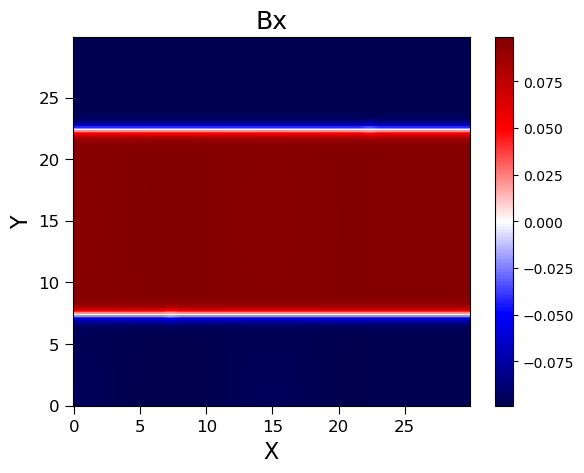

In [28]:
import matplotlib.pyplot as plt
plt.pcolormesh(X,Y,Bx, cmap='seismic')
plt.xlabel("X", fontsize = 16); plt.ylabel("Y", fontsize = 16)
plt.tick_params(axis = 'x', which = 'major', labelsize = 12, length = 6)
plt.tick_params(axis = 'y', which = 'major', labelsize = 12, length = 6)
plt.title("Bx", fontsize = 18); plt.colorbar()

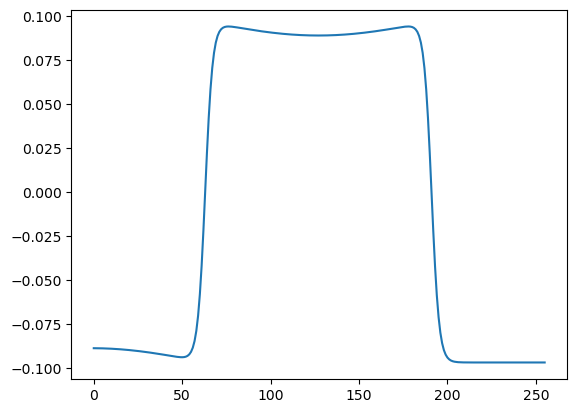

In [80]:
plt.plot(Bx[:,0])

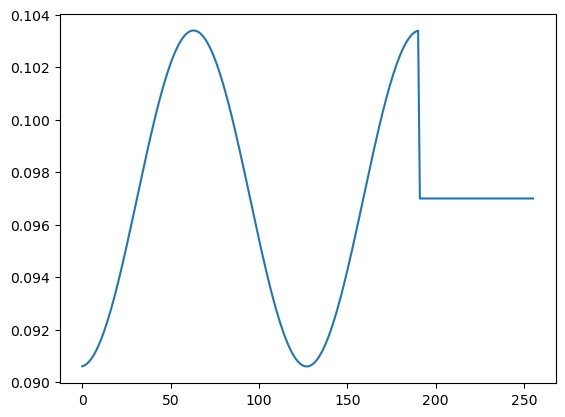

In [83]:
plt.plot(Bx[100,:])

<KeysViewHDF5 ['fields', 'moments', 'topology']>
<KeysViewHDF5 ['Bx', 'By', 'Bz', 'Ex', 'Ey', 'Ez']>
<KeysViewHDF5 ['Jx', 'Jy', 'Jz', 'rho', 'species_0', 'species_1', 'species_2', 'species_3']>
<KeysViewHDF5 ['cycle_0', 'cycle_1000', 'cycle_1200', 'cycle_1400', 'cycle_1600', 'cycle_1800', 'cycle_200', 'cycle_2000', 'cycle_2200', 'cycle_2400', 'cycle_2600', 'cycle_2800', 'cycle_3000', 'cycle_3200', 'cycle_3400', 'cycle_3600', 'cycle_3800', 'cycle_400', 'cycle_4000', 'cycle_4200', 'cycle_4400', 'cycle_4600', 'cycle_4800', 'cycle_5000', 'cycle_5200', 'cycle_5400', 'cycle_5600', 'cycle_5800', 'cycle_600', 'cycle_6000', 'cycle_800']>
<KeysViewHDF5 ['Jx', 'Jy', 'Jz', 'rho']>
[240]
Processing  256  files


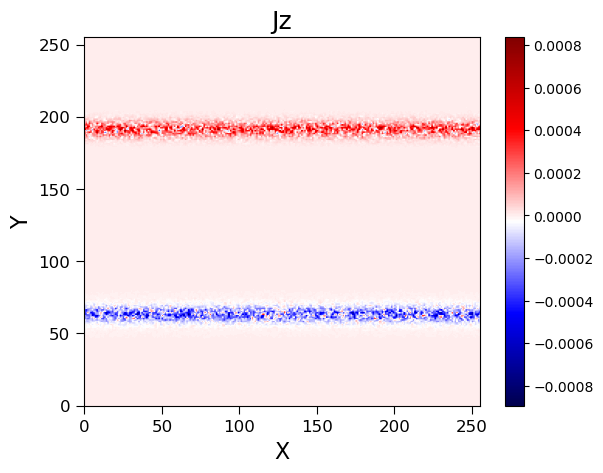

In [15]:
import h5py
import numpy as np
XLEN, YLEN, ZLEN = 5, 5, 1
num_expected_files = XLEN * YLEN * ZLEN
time_cycle = "cycle_0"
###* Broadcast number of local grid cells


with h5py.File(all_hdf_files[0], "r") as f:
    print(f.keys())
    print(f['fields'].keys())
    print(f['moments'].keys())
    print(f['fields/Bx'].keys())
    print(f['moments/species_0'].keys())
    print(f['topology']['Xleft_neighbor'][()])
    sample = np.array(f["fields/Bx/" + time_cycle])[:-1, :-1, :-1]
    nx_local, ny_local, nz = sample.shape
nx_local, ny_local, nz

###* Define global size
nx_global = XLEN * nx_local
ny_global = YLEN * ny_local

###* Divide files among ranks (chunked distribution)
local_files = all_hdf_files
print("Processing ", len(all_hdf_files), " files")

###* Local storage (per MPI task)
Jz = np.zeros_like(X)

###* Process assigned files

for file_path in local_files:
    
    rank_id = int(os.path.basename(file_path).replace("proc", "").replace(".hdf", ""))
    with h5py.File(file_path, "r") as f:
        field_data = np.array(f["moments/species_0/Jz/" + time_cycle])[:-1, :-1, :-1]
        x0, y0, z0 = field_data.shape[0]*f['topology']['cartesian_coord'][()]
        nx_local, ny_local, nz_local = field_data.shape
        i = x0 // (nx_local+1)
        j = y0 // (ny_local+1)
        k = z0 // (nz_local+1)
        if rank_id != f['topology']['cartesian_rank'][()]:
            raise ValueError(f"Rank ID {rank_id} does not match cartesian rank {f['topology']['cartesian_rank'][()]} in file {file_path}")
        Jz[x0:x0 + nx_local, y0:y0 + ny_local] = field_data[:, :, 0]
        
###* =================================================================== *###
Jz = Jz.transpose()
###? Gather results at root MPI process

import matplotlib.pyplot as plt
plt.imshow(Jz, origin='lower', cmap='seismic', aspect = "auto")
plt.xlabel("X", fontsize = 16); plt.ylabel("Y", fontsize = 16)
plt.tick_params(axis = 'x', which = 'major', labelsize = 12, length = 6)
plt.tick_params(axis = 'y', which = 'major', labelsize = 12, length = 6)
plt.title("Jz", fontsize = 18); plt.colorbar()